In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILE_ID' -O your_dataset.csv

--2025-10-08 17:37:23--  https://docs.google.com/uc?export=download&id=FILE_ID
Resolving docs.google.com (docs.google.com)... 74.125.199.113, 74.125.199.138, 74.125.199.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.199.113|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-10-08 17:37:23 ERROR 404: Not Found.



In [ ]:
data = pd.read_csv("BMW sales data (2010-2024) (1).csv")
data.head()


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [ ]:
cat_counts = data['Model'].value_counts()
display(cat_counts)

,count
Model,
7 Series,4666
i3,4618
i8,4606
3 Series,4595
5 Series,4592
X1,4570
X3,4497
X5,4487
M5,4478


In [ ]:
x_bar = cat_counts.index
y_bar = cat_counts.values

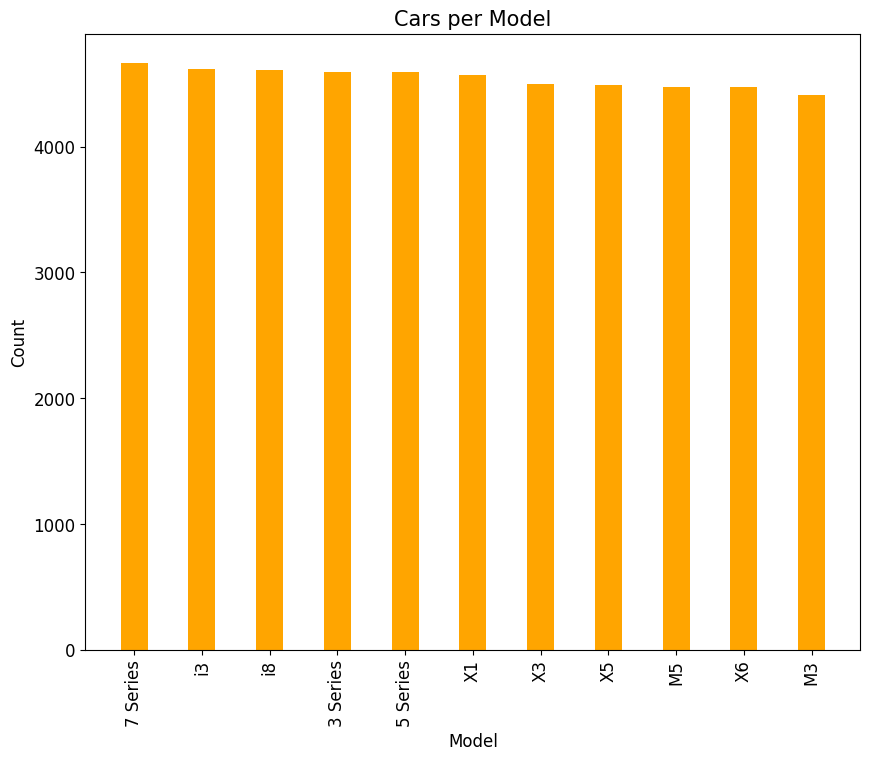

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(x_bar, y_bar, width=0.4, color='orange')
plt.title('Cars per Model', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

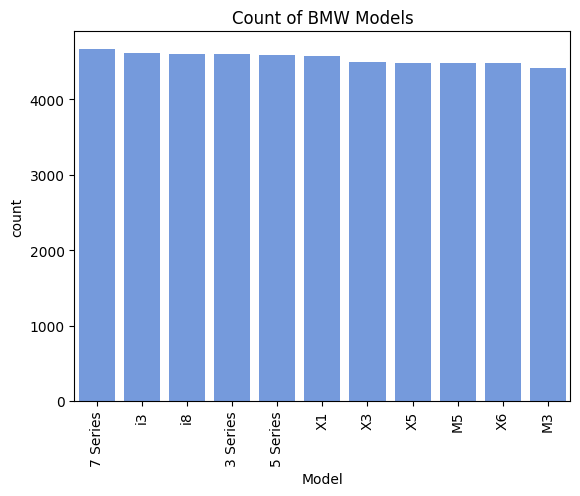

In [ ]:
sns.countplot(x='Model', data=data, order=data['Model'].value_counts().index, color='cornflowerblue')
plt.xticks(rotation=90)
plt.title('Count of BMW Models')
plt.show()

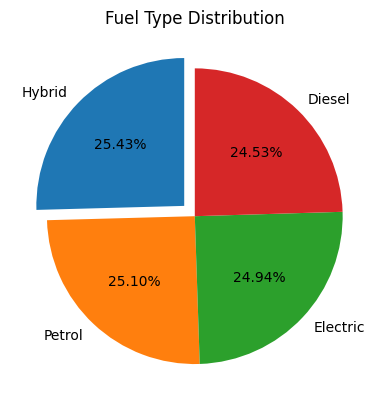

In [ ]:
fuel_counts = data['Fuel_Type'].value_counts()
plt.pie(fuel_counts,
        labels=fuel_counts.index,
        startangle=90,
        explode=(0.1, 0, 0, 0),  # adjust explode based on unique values
        autopct='%.2f%%')
plt.title('Fuel Type Distribution')
plt.show()

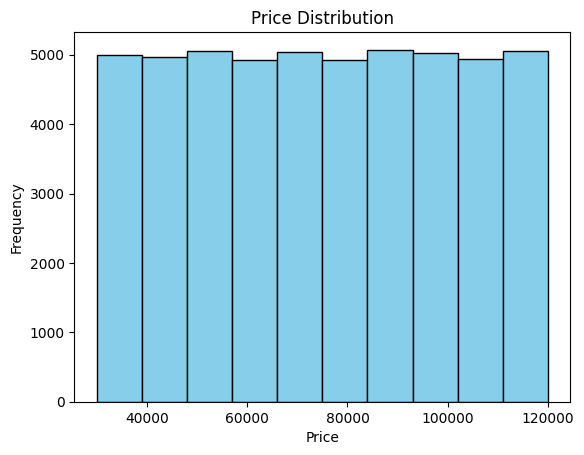

In [ ]:
plt.hist(data['Price_USD'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

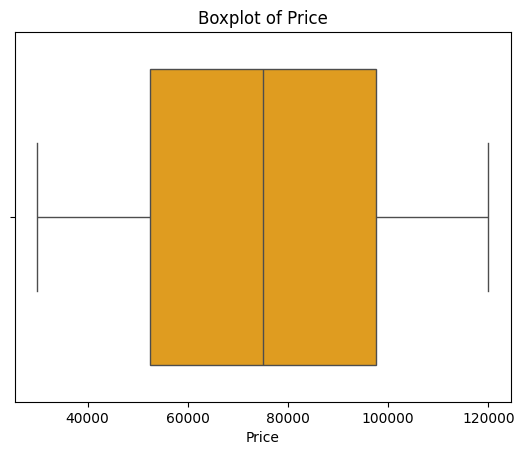

In [ ]:
sns.boxplot(x=data['Price_USD'], color='orange')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

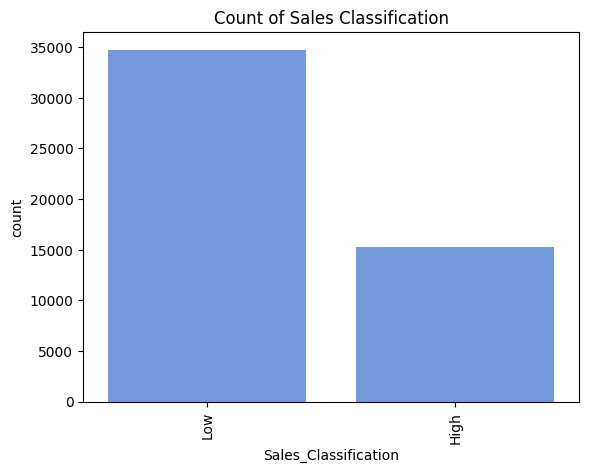

In [ ]:
sns.countplot(x='Sales_Classification', data=data, order=data['Sales_Classification'].value_counts().index, color='cornflowerblue')
plt.xticks(rotation=90)
plt.title('Count of Sales Classification')
plt.show()

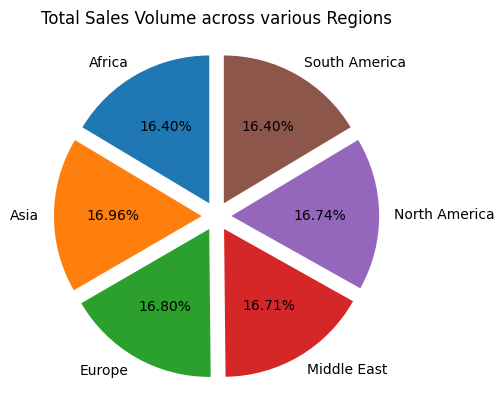

In [ ]:
region_sales = data.groupby('Region')['Sales_Volume'].sum()

plt.pie(region_sales,
       labels=region_sales.index,
       startangle=90,
       autopct = '%.2f%%', # label the wedges with their numeric value
       explode = [0.1] * len(region_sales.index)) # explode all wedges slightly for better visibility


plt.title('Total Sales Volume across various Regions')
plt.show()

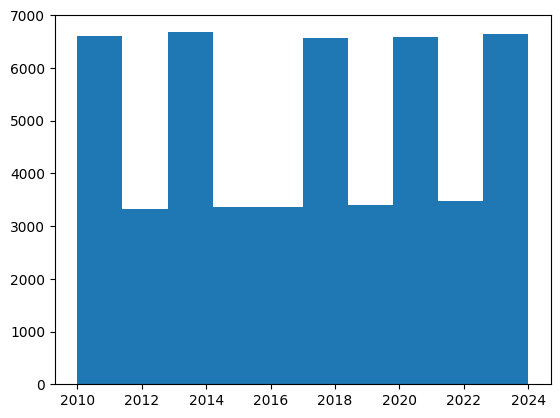

In [ ]:
count, bins, _ = plt.hist(data['Year'])

<Axes: xlabel='Year', ylabel='Density'>

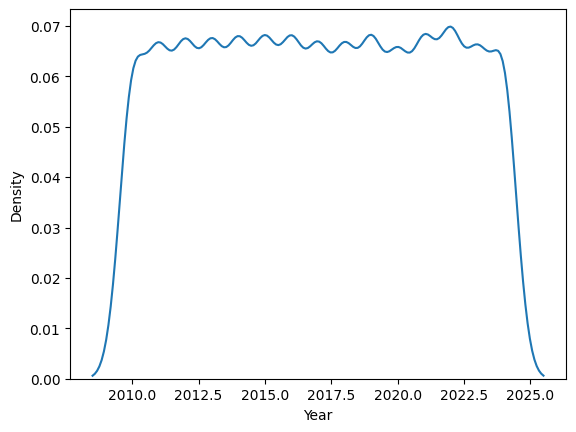

In [ ]:
sns.kdeplot(data['Year'])

<Axes: xlabel='Year', ylabel='Count'>

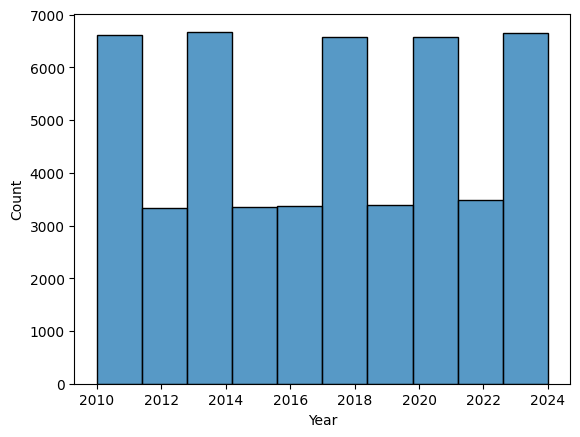

In [ ]:
sns.histplot(data['Year'], bins=10)

Text(0.5, 1.0, 'Sales Volume of BMW Cars')

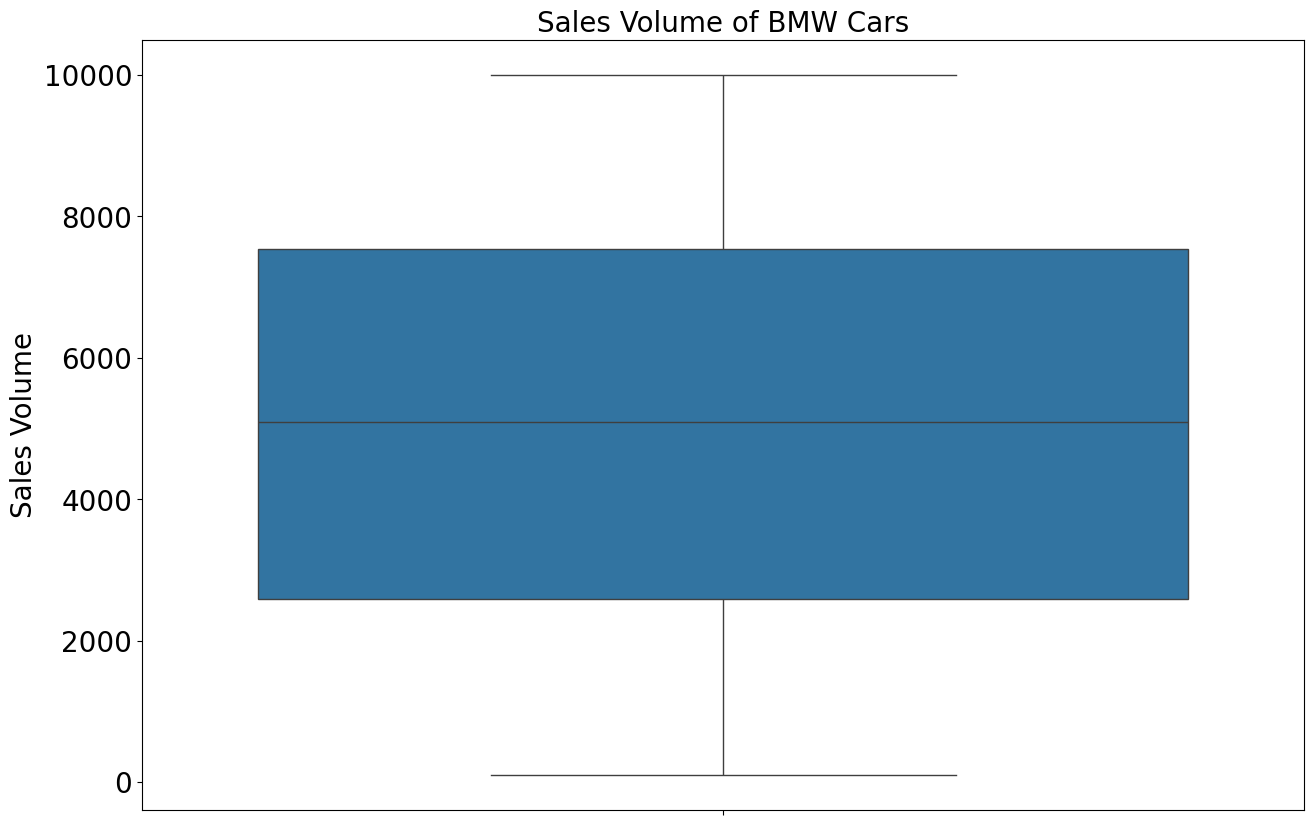

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y = data["Sales_Volume"])
plt.yticks(fontsize=20)
plt.ylabel('Sales Volume', fontsize=20)
plt.title('Sales Volume of BMW Cars', fontsize=20)